# Perceptron from scratch on Breast Cancer data
**[For theory & scratch implementation, click here.](1_scratch_fake.ipynb)**

## Load Data

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

## Make Prediction using Perceptron

In [6]:
def predict_one(x, weights):
    activation = weights[0]
    for i in range(len(x)):
        activation += x[i]*weights[i+1]
    if activation >= 0:
        return 1
    else:
        return 0

## Learning Weights

In [7]:
def fit(X, y, l_rate, n_epoch):
    # weight 0 represents bias
    n_features = len(X[0])
    weights = [0.0 for _ in range(n_features+1)]
    errors=[]
    for epoch in range(n_epoch):
        # Sum Squared error
        sum_error = 0
        for i in range(len(X)):
            prediction = predict_one(X[i], weights)
            error = y[i] - prediction
            sum_error += error*error
            weights[0] += l_rate*error
            for j in range(n_features):
                weights[j+1] += l_rate*error*X[i,j]
        errors.append(sum_error)
        print("Epoch %2d => Error %.3f"%(epoch+1, sum_error))
    return (weights, errors)

In [8]:
l_rate = 0.001
n_epoch = 50
weights, errors = fit(X_train, y_train, l_rate, n_epoch)

Epoch  1 => Error 141.000
Epoch  2 => Error 100.000
Epoch  3 => Error 86.000
Epoch  4 => Error 80.000
Epoch  5 => Error 81.000
Epoch  6 => Error 74.000
Epoch  7 => Error 72.000
Epoch  8 => Error 71.000
Epoch  9 => Error 65.000
Epoch 10 => Error 65.000
Epoch 11 => Error 64.000
Epoch 12 => Error 61.000
Epoch 13 => Error 51.000
Epoch 14 => Error 58.000
Epoch 15 => Error 63.000
Epoch 16 => Error 52.000
Epoch 17 => Error 51.000
Epoch 18 => Error 55.000
Epoch 19 => Error 50.000
Epoch 20 => Error 48.000
Epoch 21 => Error 44.000
Epoch 22 => Error 53.000
Epoch 23 => Error 53.000
Epoch 24 => Error 53.000
Epoch 25 => Error 53.000
Epoch 26 => Error 53.000
Epoch 27 => Error 53.000
Epoch 28 => Error 44.000
Epoch 29 => Error 44.000
Epoch 30 => Error 56.000
Epoch 31 => Error 47.000
Epoch 32 => Error 41.000
Epoch 33 => Error 39.000
Epoch 34 => Error 41.000
Epoch 35 => Error 41.000
Epoch 36 => Error 41.000
Epoch 37 => Error 44.000
Epoch 38 => Error 46.000
Epoch 39 => Error 46.000
Epoch 40 => Error 43.00

In [9]:
import seaborn as sns

In [10]:
sns.set_style("darkgrid")
sns.set_palette("prism")

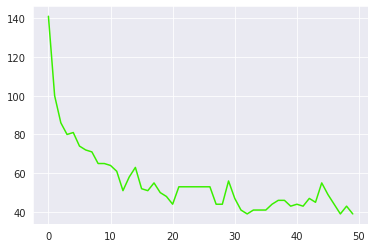

In [11]:
sns.lineplot(x=range(n_epoch), y=errors)

In [12]:
predictions = [predict_one(x, weights) for x in X_test]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[53  5]
 [14 99]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        58
           1       0.95      0.88      0.91       113

    accuracy                           0.89       171
   macro avg       0.87      0.89      0.88       171
weighted avg       0.90      0.89      0.89       171



## We shouldn't expect much from just a single Perceptron!